In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
men=Memory("./mycache")


In [3]:
#使用sklearn库的load_svmlight_file函数读取数据
def get_data():
    data=load_svmlight_file('housing_scale')
    return data[0].todense(),data[1]

#读数据
X,y=get_data()
y=np.reshape(y,(len(y),1))

In [4]:
#使用train_test_split函数切分数据集,test_size=0.33
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

#为X_train和X_test加上一列，置为1，也就是w0，截距项
(n,m)=np.shape(X_train)
X_train=np.hstack((X_train,np.ones((n,1))))   
(n,m)=np.shape(X_test)
X_test=np.hstack((X_test,np.ones((n,1))))

#利用X的列数得到权重函数w（权重矩阵
(n,m)=np.shape(X_test)
w=np.zeros((m,1))

#y=θ0*x0+θ1*x1+...+θn*xn

In [5]:
#定义梯度下降的次数，迭代次数iterations
iterations=500                

#调节参数alpha，即学习率
alpha=0.0005                   

In [6]:
#定义loss函数,y_为预测结果
def loss(X,w,y):
    y_=X*w         
    s=0
    for i in range(0,len(y)):        
        s=s+(y_[i]-y[i])**2
    return s/(len(y))

In [7]:
#定义梯度函数，lamda默认为0
def gradient(X,w,y,lamda=0):
    g=lamda*w+X.T*(X*w-y)
    return g

In [8]:
#定义梯度下降函数
def LinearRegression(X,y,w,lamda,iterations,X_test,y_test,gradient=gradient,loss=loss):
#     grad=0
    loss_train=[]
    loss_test=[]
    #以设置的次数开始迭代，进行梯度下降
    for i in range(iterations):
        g=gradient(X,w,y,lamda)                           #计算梯度
        w=w-alpha*g                                       #梯度下降
        loss_train.append(loss(X,w,y)[0,0])               #训练集上的loss
        loss_test.append(loss(X_test,w,y_test)[0,0])      #测试集上的loss
    return loss_train,loss_test

In [9]:
#开始回归
loss_train,loss_test=LinearRegression(X=X_train,y=y_train,w=w,lamda=0,iterations=iterations,X_test=X_test,y_test=y_test)

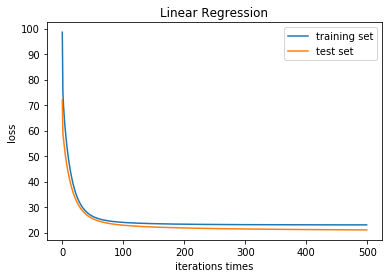

In [10]:
#绘图，横坐标为迭代次数，纵坐标为loss值
plt.xlabel('iterations times')
plt.ylabel('loss')
plt.title("Linear Regression")
plt.plot(range(iterations),loss_train,label='training set')
plt.plot(range(iterations),loss_test,label='test set')
plt.legend()
plt.show()

In [11]:
#最后的loss值：
print('loss_train:')
print(loss_train[-1])
print('loss_test:')
print(loss_test[-1])

loss_train:
23.0089703862
loss_test:
21.0332042376
